### Imports

In [1]:
import pandas as pd
import numpy as np

### Matplotlib, Seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

### Carga de datos

In [3]:
# Columnas a cargar
columnas_cargar = ["date", "device_id", "platform", "ref_type_id", "source_id"]
# Definicion de tipos
tipos = {"device_id" : np.int64,
         "platform" : np.int8,
         "ref_type_id" : np.int8,
         "source_id" : np.int8}
# Carga de datos
auctions = pd.read_csv("../../../data/auctions.csv", usecols=columnas_cargar, dtype=tipos, parse_dates=["date"])

# Preguntas 

# ¿Cuáles son los 10 dispositivos que más aparecieron en subastas?

In [20]:
top_10_dispositivos = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns = {"platform" : "apariciones"}).nlargest(10, "apariciones")

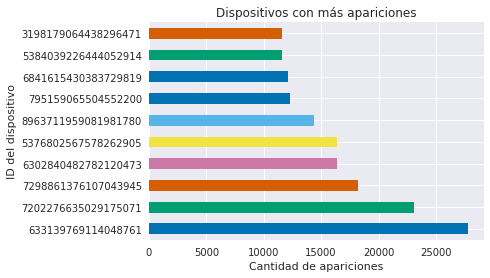

In [31]:
plt.figure(figsize=(6, 4))
top_10_dispositivos["apariciones"].plot(kind="barh")
plt.title("Dispositivos con más apariciones")
plt.xlabel("Cantidad de apariciones")
plt.ylabel("ID del dispositivo");

# ¿Cuántos dispositivos diferentes aparecieron en subastas?

In [35]:
len(auctions["device_id"].value_counts())

206977

# ¿Cómo se distribuye la cantidad de apariciones en subastas?

In [36]:
apariciones = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns = {"platform" : "apariciones"})

/opt/anaconda/3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


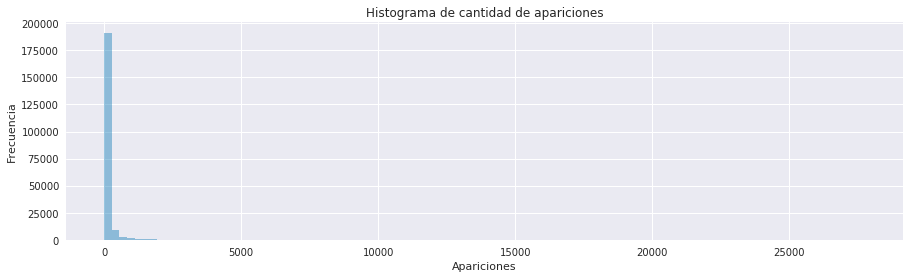

In [83]:
plt.figure(figsize=(15, 4))
sns.distplot(apariciones["apariciones"], bins=100, kde=False)
plt.title("Histograma de cantidad de apariciones")
plt.xlabel("Apariciones")
plt.ylabel("Frecuencia");